### Importing libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### Importing the data in a Pandas dataframe

In [2]:
df = pd.read_csv('bostondata.csv')

### Viewing the data and analyzing the dataset

In [3]:
df.shape

(506, 14)

In [4]:
df.head(n = 5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.00632,18,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001


In [5]:
df.tail(n=6)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
500,0.22438,0,9.69,0,0.585,6.027,79.699997,2.4982,6,391,19.200001,396.899994,14.33,16.799999
501,0.06263,0,11.93,0,0.573,6.593,69.099998,2.4786,1,273,21.000000,391.989990,9.67,22.400000
502,0.04527,0,11.93,0,0.573,6.120,76.699997,2.2875,1,273,21.000000,396.899994,9.08,20.600000
503,0.06076,0,11.93,0,0.573,6.976,91.000000,2.1675,1,273,21.000000,396.899994,5.64,23.900000
504,0.10959,0,11.93,0,0.573,6.794,89.300003,2.3889,1,273,21.000000,393.450012,6.48,22.000000
505,0.04741,0,11.93,0,0.573,6.030,80.800003,2.5050,1,273,21.000000,396.899994,7.88,11.900000


In [6]:
#  From the above slices, the columns ZN,CHAS,RAD and seem to be discrete
#  while all other variables are continuous

In [7]:
df.dtypes

CRIM     float64
ZN        object
INDUS    float64
CHAS      object
NOX      float64
RM       float64
AGE      float64
DIS      float64
RAD       object
TAX        int64
PT       float64
B        float64
LSTAT    float64
MV       float64
dtype: object

In [8]:
#  ZN,CHAS and RAD seem to contain only numeric values but their type is 'object' indicating the presence
#  of garbage values

### Removing unwanted characters

In [9]:
df['ZN'].unique()

array(['18', '0', '12.5', '#', '75', '21', '90', '85', '100', '25',
       '17.5', '80', '28', '45', '60', '95', '82.5', '30', '22', '20',
       '40', '55', '52.5', '70', '34', '33', '35'], dtype=object)

In [10]:
#  ZN is also a continuous variable

In [11]:
df["ZN"].value_counts()

0       372
20       21
80       15
22       10
25       10
12.5      9
40        7
45        6
30        6
90        5
21        4
95        4
33        4
60        4
52.5      3
35        3
75        3
34        3
55        3
28        3
70        3
82.5      2
85        2
100       1
#         1
17.5      1
18        1
Name: ZN, dtype: int64

In [12]:
df[df['ZN'] == '#' ]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
7,0.14455,#,7.87,0,0.524,6.172,96.099998,5.9505,5,311,15.2,396.899994,19.15,27.1


In [13]:
df = df[df['ZN'] != '#']

In [14]:
df['RAD'].unique()

array(['1', '2', '3', '5', '4', '#', '8', '6', '7', '24'], dtype=object)

In [15]:
df['RAD'].value_counts()

24    132
5     114
4     109
3      38
6      26
8      24
2      24
1      20
7      17
#       1
Name: RAD, dtype: int64

In [16]:
df = df[df['RAD'] !='#']

In [17]:
df['CHAS'].unique()

array(['0', '?', '1'], dtype=object)

In [18]:
df['CHAS'].value_counts()

0    468
1     35
?      1
Name: CHAS, dtype: int64

In [19]:
df = df[df['CHAS'] != '?']

In [20]:
df['ZN'] = df['ZN'].astype('float')
df['RAD'] = df['RAD'].astype('int')
df['CHAS']=df['CHAS'].astype('int')

In [21]:
df.shape

(503, 14)

In [22]:
df.info()   #  no columns should be integer type now 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 503 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CRIM    503 non-null    float64
 1   ZN      503 non-null    float64
 2   INDUS   503 non-null    float64
 3   CHAS    503 non-null    int32  
 4   NOX     503 non-null    float64
 5   RM      503 non-null    float64
 6   AGE     503 non-null    float64
 7   DIS     503 non-null    float64
 8   RAD     503 non-null    int32  
 9   TAX     503 non-null    int64  
 10  PT      503 non-null    float64
 11  B       503 non-null    float64
 12  LSTAT   503 non-null    float64
 13  MV      503 non-null    float64
dtypes: float64(11), int32(2), int64(1)
memory usage: 55.0 KB


### Taking Slices of the data

In [23]:
df.iloc[235:242,5:9]

,RM,AGE,DIS,RAD
238,6.481,18.500000,6.1899,6
239,6.606,42.200001,6.1899,6
240,6.897,54.299999,6.3361,6
241,6.095,65.099998,6.3361,6
242,6.358,52.900002,7.0355,6
243,6.393,7.800000,7.0355,6
244,5.593,76.500000,7.9549,7


In [24]:
df.iloc[:,2:10]

,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX
0,2.31,0,0.538,6.575,65.199997,4.0900,1,296
1,7.07,0,0.469,6.421,78.900002,4.9671,2,242
2,7.07,0,0.469,7.185,61.099998,4.9671,2,242
3,2.18,0,0.458,6.998,45.799999,6.0622,3,222
4,2.18,0,0.458,7.147,54.200001,6.0622,3,222
...,...,...,...,...,...,...,...,...
501,11.93,0,0.573,6.593,69.099998,2.4786,1,273
502,11.93,0,0.573,6.120,76.699997,2.2875,1,273
503,11.93,0,0.573,6.976,91.000000,2.1675,1,273
504,11.93,0,0.573,6.794,89.300003,2.3889,1,273


### Selecting rows and columns based on conditions

In [25]:
df[(df['CRIM'] > 50) & (df['DIS'] > 0)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
380,88.976196,0.0,18.1,0,0.671,6.968,91.900002,1.4165,24,666,20.200001,396.899994,17.209999,10.4
405,67.920799,0.0,18.1,0,0.693,5.683,100.000000,1.4254,24,666,20.200001,384.970001,22.980000,5.0
410,51.135799,0.0,18.1,0,0.597,5.757,100.000000,1.4130,24,666,20.200001,2.600000,10.110000,15.0
418,73.534103,0.0,18.1,0,0.679,5.957,100.000000,1.8026,24,666,20.200001,16.450001,20.620001,8.8


In [26]:
df[(df['CHAS'] == 1) & (df['AGE'] >= 50)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
142,3.32105,0.0,19.58,1,0.871,5.403,100.000000,1.3216,5,403,14.700000,396.899994,26.820000,13.400000
152,1.12658,0.0,19.58,1,0.871,5.012,88.000000,1.6102,5,403,14.700000,343.279999,12.120000,15.300000
154,1.41385,0.0,19.58,1,0.871,6.129,96.000000,1.7494,5,403,14.700000,321.019989,15.120000,17.000000
155,3.53501,0.0,19.58,1,0.871,6.152,82.599998,1.7455,5,403,14.700000,88.010002,15.020000,15.600000
160,1.27346,0.0,19.58,1,0.605,6.250,92.599998,1.7984,5,403,14.700000,338.920013,5.500000,27.000000
162,1.83377,0.0,19.58,1,0.605,7.802,98.199997,2.0407,5,403,14.700000,389.609985,1.920000,50.000000
163,1.51902,0.0,19.58,1,0.605,8.375,93.900002,2.1620,5,403,14.700000,388.450012,3.320000,50.000000
208,0.13587,0.0,10.59,1,0.489,6.064,59.099998,4.2392,4,277,18.600000,381.320007,14.660000,24.400000
209,0.43571,0.0,10.59,1,0.489,5.344,100.000000,3.8750,4,277,18.600000,396.899994,23.090000,20.000000
210,0.17446,0.0,10.59,1,0.489,5.960,92.099998,3.8771,4,277,18.600000,393.250000,17.270000,21.700001


### Characteristics of Discrete Variables

In [27]:
df.CHAS.describe()

count    503.000000
mean       0.069583
std        0.254695
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: CHAS, dtype: float64

In [28]:
df.CHAS.mode()

0    0
dtype: int32

In [29]:
df.RAD.describe()

count    503.000000
mean       9.578529
std        8.724953
min        1.000000
25%        4.000000
50%        5.000000
75%       24.000000
max       24.000000
Name: RAD, dtype: float64

In [30]:
df.RAD.mode()

0    24
dtype: int32

### Characteristics of Continuous Variables

In [31]:
#  making another DataFrame using only the columns with continuous values
df1 = df[['CRIM','ZN','TAX','INDUS','NOX','RM','AGE','DIS','PT','B','LSTAT','MV']]
df1.describe()

,CRIM,ZN,TAX,INDUS,NOX,RM,AGE,DIS,PT,B,LSTAT,MV
count,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000
mean,3.633073,11.381710,408.825050,11.155726,0.554850,6.285050,68.437376,3.784359,18.463420,356.476380,12.629404,22.547316
std,8.623448,23.386422,168.867039,6.876404,0.116205,0.704633,28.173426,2.106487,2.158661,91.529523,7.147192,9.214121
min,0.006320,0.000000,187.000000,0.460000,0.385000,3.561000,2.900000,1.129600,12.600000,0.320000,1.730000,5.000000
25%,0.081930,0.000000,279.000000,5.160000,0.449000,5.884500,44.700001,2.094100,17.400000,375.269989,6.925000,17.050000
50%,0.259150,0.000000,330.000000,9.690000,0.538000,6.209000,77.000000,3.182700,19.100000,391.429993,11.340000,21.200001
75%,3.685665,12.500000,666.000000,18.100000,0.624000,6.627000,93.950001,5.118000,20.200001,396.220001,16.920000,25.000000
max,88.976196,100.000000,711.000000,27.740000,0.871000,8.780000,100.000000,12.126500,22.000000,396.899994,37.970001,50.000000


#### Percentiles

In [32]:
df1.quantile(0.1)     #10th percentile in each column

CRIM       0.037886
ZN         0.000000
TAX      233.000000
INDUS      2.898000
NOX        0.426400
RM         5.593200
AGE       26.559999
DIS        1.625240
PT        14.720000
B        289.501990
LSTAT      4.674000
MV        12.720000
Name: 0.1, dtype: float64

In [33]:
df1.quantile(0.2)    #20th percentile in each column

CRIM       0.063246
ZN         0.000000
TAX      273.000000
INDUS      4.246000
NOX        0.442000
RM         5.836400
AGE       37.499999
DIS        1.947120
PT        16.600000
B        363.781995
LSTAT      6.278000
MV        15.340000
Name: 0.2, dtype: float64

In [34]:
df1.quantile(0.5)   #50th percentile in each column

CRIM       0.259150
ZN         0.000000
TAX      330.000000
INDUS      9.690000
NOX        0.538000
RM         6.209000
AGE       77.000000
DIS        3.182700
PT        19.100000
B        391.429993
LSTAT     11.340000
MV        21.200001
Name: 0.5, dtype: float64

In [35]:
df1.quantile(0.8)   #80th percentile in each column

CRIM       5.632250
ZN        20.600000
TAX      666.000000
INDUS     18.100000
NOX        0.669800
RM         6.754800
AGE       95.599998
DIS        5.537380
PT        20.200001
B        396.899994
LSTAT     18.055999
MV        28.320000
Name: 0.8, dtype: float64

In [36]:
df1.quantile(.95)   #95th percentile in each column

CRIM      15.831840
ZN        80.000000
TAX      666.000000
INDUS     21.889999
NOX        0.740000
RM         7.601000
AGE      100.000000
DIS        7.827800
PT        21.000000
B        396.899994
LSTAT     26.815000
MV        43.460000
Name: 0.95, dtype: float64

## Graphical Analysis - Plotting

### Univariate Plots

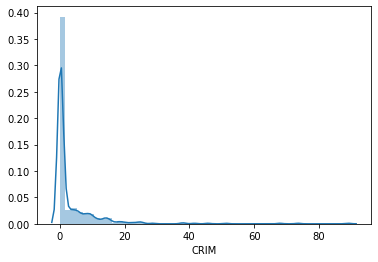

In [37]:
sns.distplot(df['CRIM'])

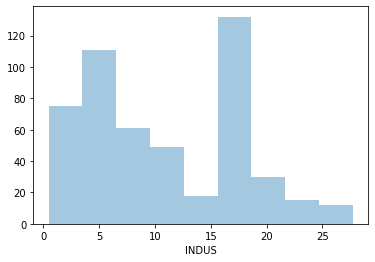

In [38]:
sns.distplot(df['INDUS'],kde = False)

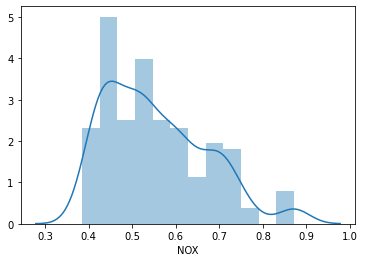

In [39]:
sns.distplot(df['NOX'])

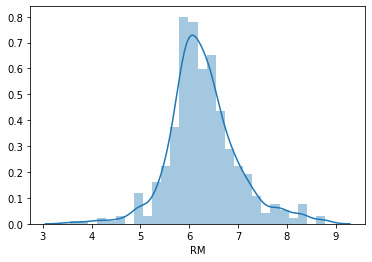

In [40]:
sns.distplot(df['RM'])

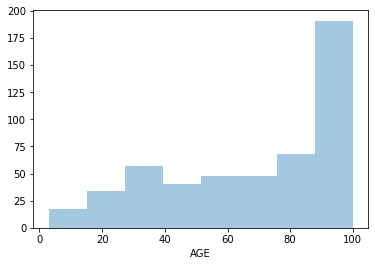

In [41]:
sns.distplot(df['AGE'], kde = False)   #plotting distribution without curve

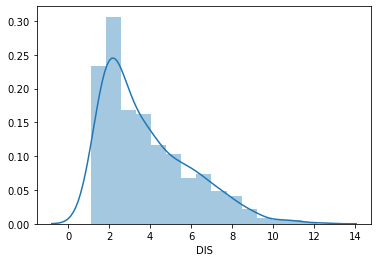

In [42]:
sns.distplot(df['DIS'])

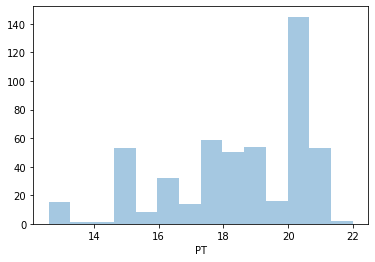

In [43]:
sns.distplot(df['PT'],kde = False)   # plotting distribution without curve

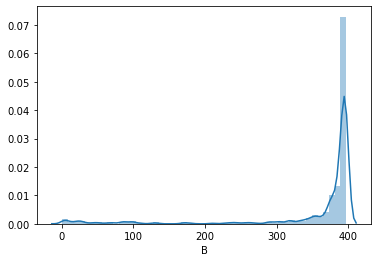

In [44]:
sns.distplot(df['B'])

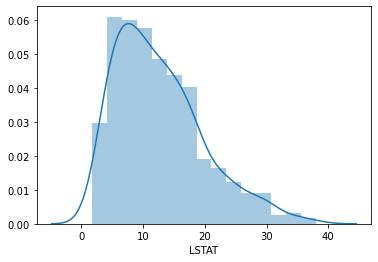

In [45]:
sns.distplot(df['LSTAT'])

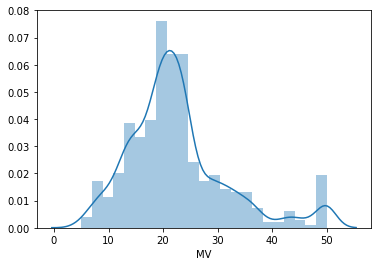

In [46]:
sns.distplot(df['MV'])

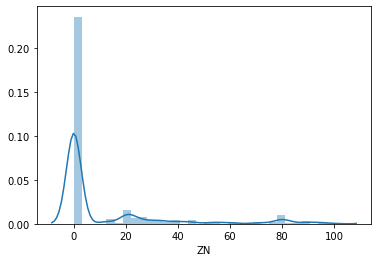

In [47]:
sns.distplot(df['ZN']) 

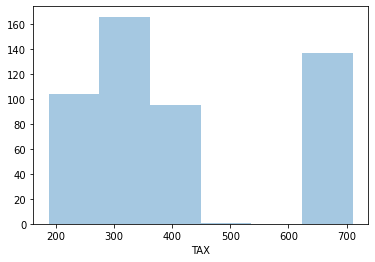

In [48]:
sns.distplot(df['TAX'],kde = False)

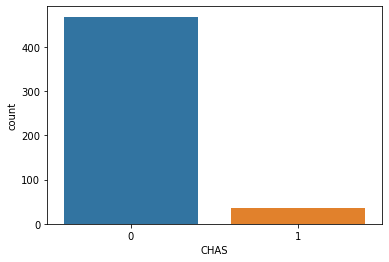

In [49]:
sns.countplot(df['CHAS'])

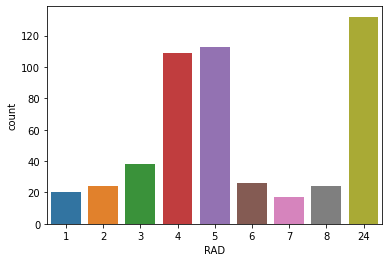

In [50]:
sns.countplot(df['RAD'])

### Bivariate Plots

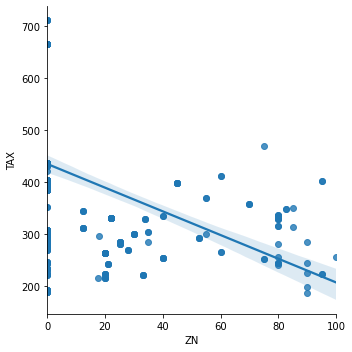

In [51]:
sns.lmplot(x = 'ZN',y = 'TAX',data = df)

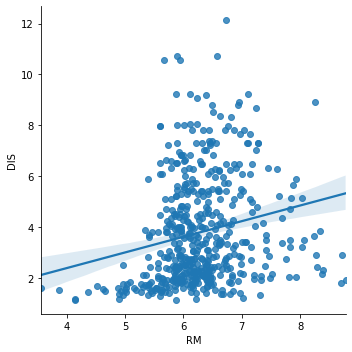

In [52]:
sns.lmplot(x = 'RM',y = 'DIS',data = df)

### Boxplots

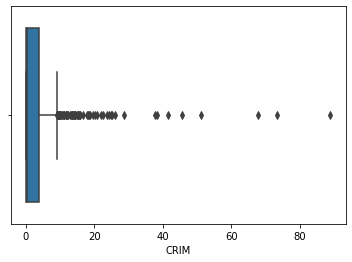

In [53]:
sns.boxplot(df['CRIM'])

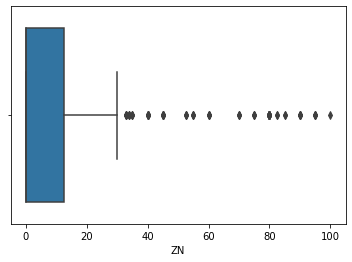

In [54]:
sns.boxplot(df['ZN'])

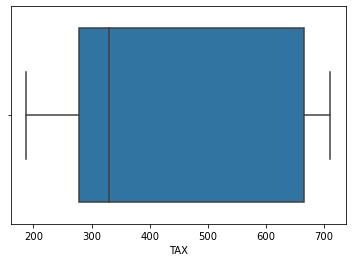

In [55]:
sns.boxplot(df['TAX'])

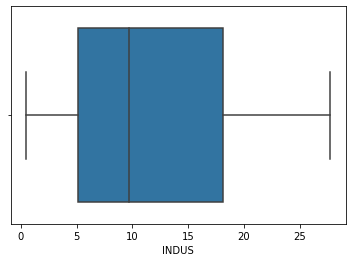

In [56]:
sns.boxplot(df['INDUS'])

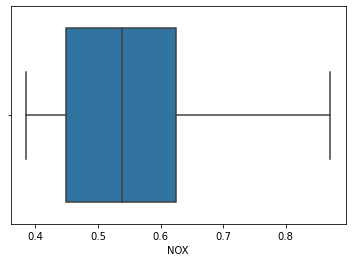

In [57]:
sns.boxplot(df['NOX'])

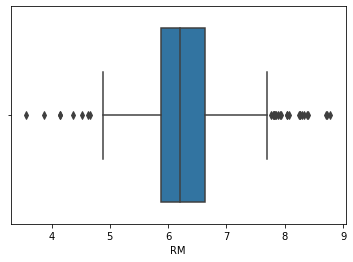

In [58]:
sns.boxplot(df['RM'])

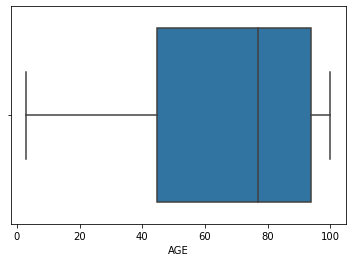

In [59]:
sns.boxplot(df['AGE'])

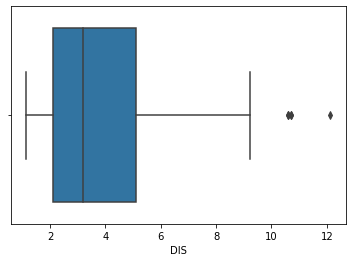

In [60]:
sns.boxplot(df['DIS'])

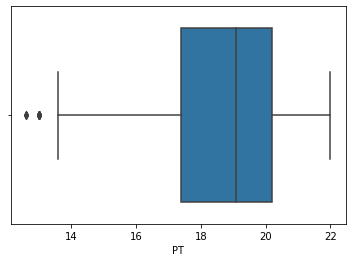

In [61]:
sns.boxplot(df['PT'])

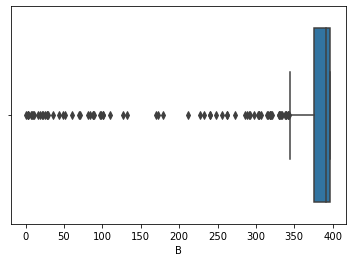

In [62]:
sns.boxplot(df['B'])

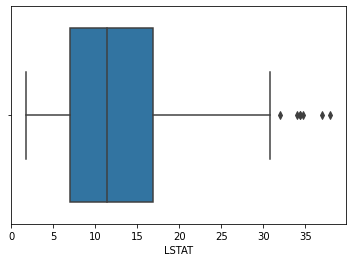

In [63]:
sns.boxplot(df['LSTAT'])

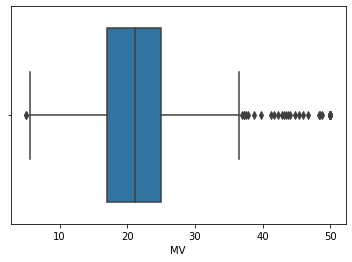

In [64]:
sns.boxplot(df['MV'])

## Normalizing Data

In [65]:
col = list(df.columns)
col.remove('MV')                   #   removing the TARGET variable from the list of columns to be normalized
for x in col:
    df[x] = (df[x] - df[x].min()) / (df[x].max() - df[x].min())
df.head()                          #                   

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,24.000000
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,21.600000
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,34.700001
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,33.400002
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,36.200001


## Importing Models and Accuracy Metrics

In [66]:
from sklearn.model_selection import train_test_split           #  for splitting dataset

from sklearn import linear_model                               #  for Simple Linear and Lasso regression
from sklearn.linear_model import SGDRegressor                  #  for Ridge regression
from sklearn.neighbors import KNeighborsRegressor              #  for KNN regression

from sklearn.metrics import mean_squared_error,r2_score        #  for model accuracy metrics           

# Linear Regression Model

In [67]:
training_features = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PT', 'LSTAT', 'DIS']
target = ['MV']
results = dict()

# best features were selected based on several trials to get a better model

model = linear_model.LinearRegression()

### 75-25 Split

In [68]:
X_train,X_test,Y_train,Y_test = train_test_split(df[training_features],df[target],
                                                 test_size = 0.25, random_state = 26)

model.fit(X_train, Y_train)

predicted = model.predict(X_test)

a = mean_squared_error(Y_test,predicted)
b = r2_score(Y_test,predicted)
print('Mean squared error: %.2f' %a)
print('R square error: %.2f' %b)
results.update({str(model)+' 0.25 Test' : b})

Mean squared error: 18.79
R square error: 0.81


### 80-20 Split

In [69]:
X_train,X_test,Y_train,Y_test = train_test_split(df[training_features],df[target],
                                                 test_size = 0.25, random_state = 26)

model.fit(X_train, Y_train)

predicted = model.predict(X_test)

a = mean_squared_error(Y_test,predicted)
b = r2_score(Y_test,predicted)
print('Mean squared error: %.2f' %a)
print('R square error: %.2f' %b)
results.update({str(model)+' 0.20 Test' : b})

Mean squared error: 18.79
R square error: 0.81


### 90-10 Split

In [70]:
X_train,X_test,Y_train,Y_test = train_test_split(df[training_features],df[target],
                                                 test_size = 0.25, random_state = 26)

model.fit(X_train, Y_train)

predicted = model.predict(X_test)

a = mean_squared_error(Y_test,predicted)
b = r2_score(Y_test,predicted)
print('Mean squared error: %.2f' %a)
print('R square error: %.2f' %b)
results.update({str(model)+' 0.10 Test' : b})

Mean squared error: 18.79
R square error: 0.81


# Ridge Regression

In [71]:
model = linear_model.Ridge(alpha = 10)

In [72]:
X_train,X_test,Y_train,Y_test = train_test_split(df[col],df[target],
                                                 test_size = 0.1, random_state = 67)

model.fit(X_train, Y_train)

predicted = model.predict(X_test)

a = mean_squared_error(Y_test,predicted)
b = r2_score(Y_test,predicted)
print('Mean squared error: %.2f' %a)
print('R square error: %.2f' %b)
results.update({str(model) : b})

Mean squared error: 10.34
R square error: 0.83


# Lasso Regression

In [73]:
model = linear_model.Lasso(alpha = 1)

In [74]:
#   taking all columns for this model as it will indicate which variables will be useful for prediction

X_train,X_test,Y_train,Y_test = train_test_split(df[col],df[target],
                                                 test_size = 0.2, random_state = 65)

model.fit(X_train, Y_train)

predicted = model.predict(X_test)

a = mean_squared_error(Y_test,predicted)
b = r2_score(Y_test,predicted)
print('Mean squared error: %.2f' %a)
print('R square error: %.2f' %b)
results.update({str(model) : b})

Mean squared error: 87.25
R square error: 0.19


In [75]:
#   printing coefficients for training variables and intercept
print("Coefficients: \n",model.coef_)
print("Intercept: \n",model.intercept_)

Coefficients: 
 [-0.          0.         -0.          0.         -0.          0.
 -0.          0.         -0.         -2.38244446 -0.          0.
 -5.38322131]
Intercept: 
 [25.16462304]


In [76]:
#   coefficients of all training variables are 0 excpet for TAX and LSTAT
#   thus TAX and LSTAT are the variables required for MV prediction
#   plotting bivariate plots to show trend

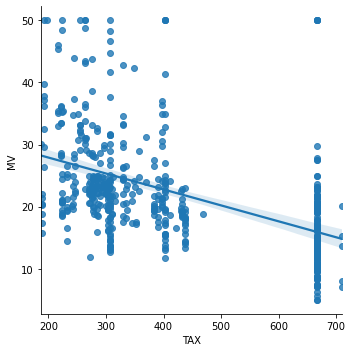

In [77]:
sns.lmplot(y = 'MV', x = 'TAX', data = df1)      #   MV variation with TAX

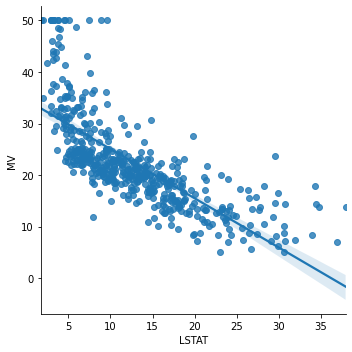

In [78]:
sns.lmplot(y = 'MV', x = 'LSTAT', data = df1)     #   MV variation with LSTAT 

## KNN Regression

In [79]:
model = KNeighborsRegressor(n_neighbors = 7,p = 1,weights = 'distance')

In [80]:
X_train,X_test,Y_train,Y_test = train_test_split(df[training_features],df[target],
                                                 test_size = 0.25, random_state = 26)

model.fit(X_train, Y_train)

predicted = model.predict(X_test)

a = mean_squared_error(Y_test,predicted)
b = r2_score(Y_test,predicted)
print('Mean squared error: %.2f' %a)
print('R square error: %.2f' %b)
results.update({str(model) : b})

Mean squared error: 18.93
R square error: 0.81


## R score for models

In [81]:
print('R score for different models:\n')
for key in results:
    print(key,' : ',results[key])

R score for different models:

LinearRegression() 0.25 Test  :  0.8070196818812367
LinearRegression() 0.20 Test  :  0.8070196818812367
LinearRegression() 0.10 Test  :  0.8070196818812367
Ridge(alpha=10)  :  0.8278430917636593
Lasso(alpha=1)  :  0.185753850744089
KNeighborsRegressor(n_neighbors=7, p=1, weights='distance')  :  0.8056642959715778
